The Elbow Method helps us to find the best number of cluster k, in K-means clustering. The idea is to run the K-means algorithm for different values of k and calculate the Within-Cluster Sum of Squares (WCSS) for each k. WCSS shows how close the points in each cluster are to each other. Lower WCSS means tighter clusters.


In [21]:
from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import pandas as pd


# Load MNIST digits and Iris datasets
digits = load_digits()
iris = load_iris()

# Define data and labels for each dataset
X_digits, y_digits = digits.data, digits.target  # MNIST
X_iris, y_iris = iris.data, iris.target          # Iris

# Split MNIST digits dataset
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)

# Split Iris dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)



In [22]:
# Display the first 5 rows of the MNIST digits data and target
print("MNIST Digits Dataset")
print("Data (features):")
print(pd.DataFrame(X_digits).head())
print("\nLabels (target):")
print(pd.DataFrame(y_digits).head())
print(f"\nShape of MNIST data: {X_digits.shape}")
print(f"Shape of MNIST target: {y_digits.shape}")
print(f"Unique labels in MNIST: {set(y_digits)}\n")

# Display the first 5 rows of the Iris data and target
print("Iris Dataset")
print("Data (features):")
print(pd.DataFrame(X_iris, columns=iris.feature_names).head())
print("\nLabels (target):")
print(pd.DataFrame(y_iris).head())
print(f"\nShape of Iris data: {X_iris.shape}")
print(f"Shape of Iris target: {y_iris.shape}")
print(f"Unique labels in Iris: {set(y_iris)}\n")

MNIST Digits Dataset
Data (features):
    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

Labels (target):
   0
0  0
1  1
2  2
3  3
4  4

Shape of MNIST data: (1797, 64)
Shape of MNIST target: (1797,)
Unique labels in MNIST: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Iris Dataset
Data (features):
   sepal length (cm)

In [23]:
# Elbow Method Function
def plot_elbow_method(X, true_k, max_k=15, dataset_name="Dataset"):
    inertias = []
    k_values = range(1, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(k_values, inertias, 'bo-')
    plt.axvline(x=true_k, color='red', linestyle='--', label=f"True number of classes: {true_k}")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.title(f"Elbow Method for Optimal k - {dataset_name}")
    plt.legend()
    plt.show()


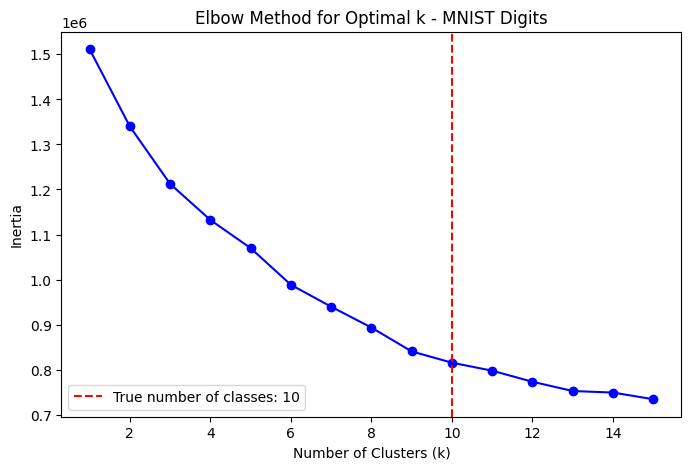

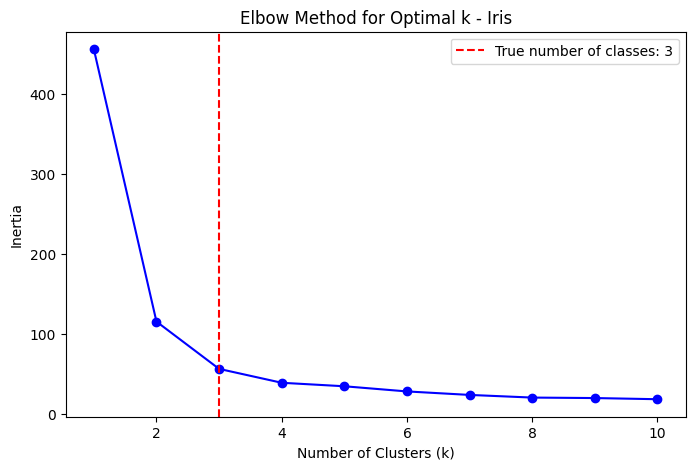

Adjusted Rand Index for MNIST digits clustering on test set: 0.6590339085071617
Adjusted Rand Index for Iris clustering on test set: 0.843550315372882


In [24]:
# Elbow method on MNIST digits training set (expecting an elbow around k=10)
plot_elbow_method(X_train_digits, true_k=10, max_k=15, dataset_name="MNIST Digits")

# Elbow method on Iris training set (expecting an elbow around k=3)
plot_elbow_method(X_train_iris, true_k=3, max_k=10, dataset_name="Iris")

# For MNIST digits
kmeans_digits = KMeans(n_clusters=10, random_state=42).fit(X_train_digits)
y_pred_digits = kmeans_digits.predict(X_test_digits)
ari_digits = adjusted_rand_score(y_test_digits, y_pred_digits)
print("Adjusted Rand Index for MNIST digits clustering on test set:", ari_digits)

# For Iris
kmeans_iris = KMeans(n_clusters=3, random_state=42).fit(X_train_iris)
y_pred_iris = kmeans_iris.predict(X_test_iris)
ari_iris = adjusted_rand_score(y_test_iris, y_pred_iris)
print("Adjusted Rand Index for Iris clustering on test set:", ari_iris)



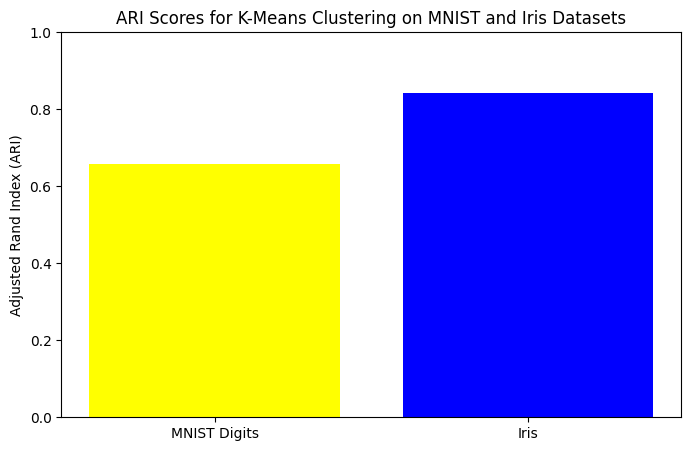

In [25]:
plt.figure(figsize=(8, 5))
plt.bar(['MNIST Digits', 'Iris'], [ari_digits, ari_iris], color=['yellow', 'blue'])
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("ARI Scores for K-Means Clustering on MNIST and Iris Datasets")
plt.ylim(0, 1)
plt.show()

I applied the Elbow Method to the MNIST digits and Iris datasets to find the best number of groups (clusters).

MNIST Digits:

The Elbow Method helped us find the best number of clusters. The Adjusted Rand Index (ARI) for clustering the test set was 0.659. This means the clusters somewhat matched the real labels.

Iris Dataset:

For the Iris dataset, the Elbow Method also pointed out a good number of clusters. The ARI here was 0.844, indicating a strong match between the clusters and the actual classes.


 The Elbow Method worked well for both datasets. The Iris dataset showed better clustering results than the MNIST digits, based on the ARI scores..